In [5]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.formula.api import ols
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

In [2]:
%matplotlib inline
pd.set_option('display.max_columns', 100)

In [3]:
def import_data():
    df = pd.read_pickle('../data/SeoulBikeData.pkl')
    df.columns = df.columns.str.replace(' ', '_')
    return df

In [4]:
df = import_data()
df.head()

,Date,Rented_Bike_Count,Hour,Temperature,Humidity,Wind_speed,Visibility,Dew_point_temperature,Solar_Radiation,Rainfall,Snowfall,Seasons,Holiday,Functioning_Day
0,1/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,1/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,1/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,1/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,1/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


### Dealing with Categorical variables

In [6]:
df['holidays'] = np.where(df['Holiday']=='Holiday', 1, 0)

In [7]:
df['functions'] = np.where(df['Functioning_Day']=='Yes', 1, 0)

In [8]:
df['rain'] = np.where(df['Rainfall'] > 0, 1, 0)
df['snow'] = np.where(df['Snowfall'] > 0, 1, 0)

### Dealing with Continuous variables

In [9]:
non_str_col = df.describe().columns.tolist()
non_str_col.remove('Rented_Bike_Count')
non_str_col

['Hour',
 'Temperature',
 'Humidity',
 'Wind_speed',
 'Visibility',
 'Dew_point_temperature',
 'Solar_Radiation',
 'Rainfall',
 'Snowfall',
 'holidays',
 'functions',
 'rain',
 'snow']

In [10]:
df['Date'] = pd.to_datetime(df['Date'])
df['Month'] = df['Date'].dt.month
df['wkday'] = df['Date'].dt.dayofweek

In [11]:
df['log_vis'] = np.log1p(df['Visibility']) # taking logarithm 

In [13]:
df.columns
all_feats = df.columns.tolist()
all_feats.remove('Date')
all_feats.remove('Rented_Bike_Count')
all_feats.remove('Seasons')
all_feats.remove('Functioning_Day')
all_feats.remove('Holiday')

In [14]:
all_feats

['Hour',
 'Temperature',
 'Humidity',
 'Wind_speed',
 'Visibility',
 'Dew_point_temperature',
 'Solar_Radiation',
 'Rainfall',
 'Snowfall',
 'holidays',
 'functions',
 'rain',
 'snow',
 'Month',
 'wkday',
 'log_vis']

In [15]:
m = ols('Rented_Bike_Count ~ Month + wkday + Hour + Temperature + Humidity + Wind_speed + Visibility + log_vis + Dew_point_temperature + Solar_Radiation + Rainfall + Snowfall + rain + snow + holidays + functions',df).fit()
print(m.summary())

                            OLS Regression Results                            
Dep. Variable:      Rented_Bike_Count   R-squared:                       0.549
Model:                            OLS   Adj. R-squared:                  0.548
Method:                 Least Squares   F-statistic:                     663.9
Date:                Wed, 04 Nov 2020   Prob (F-statistic):               0.00
Time:                        17:10:09   Log-Likelihood:                -65617.
No. Observations:                8760   AIC:                         1.313e+05
Df Residuals:                    8743   BIC:                         1.314e+05
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept              -904.34

In [16]:
m = ols('Rented_Bike_Count ~ Month + wkday + Hour + log_vis + Temperature + Humidity + Solar_Radiation + rain + holidays + functions',df).fit()
print(m.summary())

                            OLS Regression Results                            
Dep. Variable:      Rented_Bike_Count   R-squared:                       0.547
Model:                            OLS   Adj. R-squared:                  0.547
Method:                 Least Squares   F-statistic:                     1057.
Date:                Wed, 04 Nov 2020   Prob (F-statistic):               0.00
Time:                        17:10:10   Log-Likelihood:                -65630.
No. Observations:                8760   AIC:                         1.313e+05
Df Residuals:                    8749   BIC:                         1.314e+05
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        -647.7523     84.128     

In [17]:
df.head()

,Date,Rented_Bike_Count,Hour,Temperature,Humidity,Wind_speed,Visibility,Dew_point_temperature,Solar_Radiation,Rainfall,Snowfall,Seasons,Holiday,Functioning_Day,holidays,functions,rain,snow,Month,wkday,log_vis
0,2017-01-12,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,0,1,0,0,1,3,7.601402
1,2017-01-12,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,0,1,0,0,1,3,7.601402
2,2017-01-12,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,0,1,0,0,1,3,7.601402
3,2017-01-12,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,0,1,0,0,1,3,7.601402
4,2017-01-12,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,0,1,0,0,1,3,7.601402


In [18]:
X_train, X_test, y_train, y_test = train_test_split(df[all_feats], df['Rented_Bike_Count'], test_size=0.3, random_state=42)

In [19]:
lm = LinearRegression()

In [20]:
lm.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [21]:
yhat = lm.predict(X_train)

In [22]:
lm.score(X_train, y_train)

0.5529869174120552

In [24]:
mean_absolute_error(yhat, y_train)

321.9326786771352

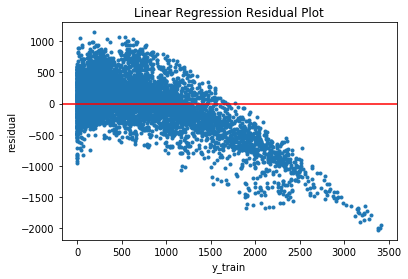

In [28]:
plt.title('Linear Regression Residual Plot')
plt.plot(y_train, yhat-y_train, '.')
plt.axhline(y=0, color='r', linestyle='-')
plt.xlabel('y_train')
plt.ylabel('residual')
plt.show()

In [30]:
from sklearn.ensemble import RandomForestRegressor

In [31]:
rf = RandomForestRegressor()

In [32]:
rf.fit(X_train, y_train)

C:\Users\wereu\Miniconda3\envs\py36\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [33]:
y_hat = rf.predict(X_train)

In [34]:
rf.score(X_train, y_train)

0.9764942128078373

In [35]:
rf.score(X_test, y_test)

0.8674704826085535

In [40]:
y_hat = rf.predict(X_test)

In [41]:
mean_absolute_error(y_hat, y_test)

139.6191400304414

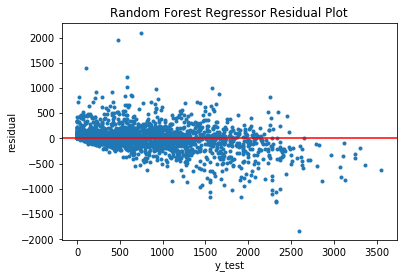

In [43]:
plt.title('Random Forest Regressor Residual Plot')
plt.plot(y_test, y_hat-y_test, '.')
plt.axhline(y=0, color='r', linestyle='-')
plt.xlabel('y_test')
plt.ylabel('residual')
plt.show()

In [27]:
y_hat_test = rf.predict(X_test)
mean_absolute_error(y_hat_test, y_test)

137.1803272450533

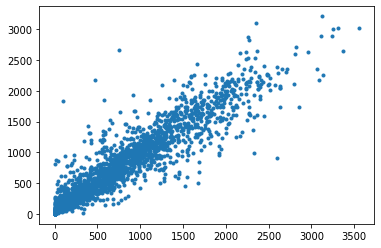

In [33]:
plt.plot(y_test, y_hat_test, '.')
plt.show()

In [29]:
X_test.shape

(2628, 16)

In [28]:
rf.get_params()

{'bootstrap': True,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 10,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

### Random Search Cross Validation for hyperparameter tuning###

In [30]:
from sklearn.model_selection import RandomizedSearchCV

In [39]:
# setting number of trees in RF
n_estimators = [int(x) for x in np.linspace(start=10, stop=100, num=10)]
n_estimators

[10, 20, 30, 40, 50, 60, 70, 80, 90, 100]

In [46]:
# number of features
max_features = ['auto', 'sqrt']
#max number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 100, num=10)]
max_depth.append(None)
max_depth
#min num of samples required to split a node
min_samples_split = [2, 5, 8]
# min num of samples required at each leaf node
min_samples_leaf = [1, 2, 3, 5]
#method of slecting samples for training each tree
bootstrap = [True, False]

rdm_grid = {'n_estimators': n_estimators,
           'max_features': max_features,
           'max_depth': max_depth,
           'min_samples_split': min_samples_split,
           'min_samples_leaf': min_samples_leaf,
           'bootstrap': bootstrap}
rdm_grid

{'n_estimators': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100],
 'max_features': ['auto', 'sqrt'],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
 'min_samples_split': [2, 5, 8],
 'min_samples_leaf': [1, 2, 3, 5],
 'bootstrap': [True, False]}

In [47]:
rf_rdm = RandomizedSearchCV(estimator=rf,
                           param_distributions=rdm_grid,
                           n_iter=100,
                           cv=3,
                           verbose=2,
                           random_state=42,
                           n_jobs=-1)
rf_rdm.fit(X_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   33.4s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  1.9min finished


RandomizedSearchCV(cv=3, error_score='raise-deprecating',
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators='warn',
                                                   n_jobs=None, oob_score=False,
                                                   random_sta...


In [48]:
rf_rdm.best_params_

{'n_estimators': 60,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 60,
 'bootstrap': False}

In [53]:
def eval_rdmsearchCV(mdl, X, y):
    pred = mdl.predict(X)
    errors = abs(pred - y)
    mape = 100 * np.mean(errors / y)
    accuracy = 100 - mape
    return accuracy

In [68]:
mdl = RandomForestRegressor()
mdl.fit(X_train, y_train)
pred = mdl.predict(X_test)
mae = mean_absolute_error(pred, y_test)
mae

C:\Users\wereu\Miniconda3\envs\py36\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


137.28466514459663

In [71]:
best_param = rf_rdm.best_estimator_
best_pred = best_param.predict(X_test)
best_mae = mean_absolute_error(best_pred, y_test)
best_mae
# not much improvement here

137.03446220192794

In [45]:
from sklearn.model_selection import GridSearchCV

In [46]:
param_grid = {
    'bootstrap': [True],
    'max_depth': [10, 20, 30, 40],
    'max_features': ['auto', 'sqrt'],
    'min_samples_leaf': [1, 2, 3],
    'min_samples_split': [2, 4, 8],
    'n_estimators': [5, 10, 15, 20]
}

In [47]:
rf = RandomForestRegressor()
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid,
                          cv=3, n_jobs=-1, verbose=2)

In [48]:
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 288 candidates, totalling 864 fits


[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   16.4s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   19.6s
[Parallel(n_jobs=-1)]: Done 612 tasks      | elapsed:   33.4s
[Parallel(n_jobs=-1)]: Done 864 out of 864 | elapsed:   41.3s finished


GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=RandomForestRegressor(bootstrap=True, criterion='mse',
                                             max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators='warn', n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='warn', n_jobs=-1,
             param_grid={'bootstrap': [True], 'max_depth':

In [49]:
grid_search.best_params_

{'bootstrap': True,
 'max_depth': 40,
 'max_features': 'auto',
 'min_samples_leaf': 1,
 'min_samples_split': 4,
 'n_estimators': 20}

In [50]:
best_param2 = grid_search.best_estimator_
best_pred2 = best_param2.predict(X_test)
best_mae2 = mean_absolute_error(best_pred2, y_test)
best_mae2

135.92751906964378

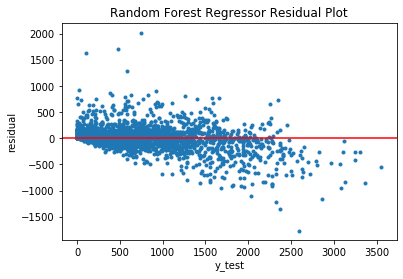

In [52]:
plt.title('Random Forest Regressor Residual Plot')
plt.plot(y_test, best_pred2-y_test, '.')
plt.axhline(y=0, color='r', linestyle='-')
plt.xlabel('y_test')
plt.ylabel('residual')
plt.show()